# 用于手写数字识别的神经网络，二分类

在这个练习中，您将使用神经网络来识别手写数字零和一。

大纲：
- [1 - 软件包](#1)
- [2 - 神经网络](#2)
  - [2.1 问题陈述](#2.1)
  - [2.2 数据集](#2.2)
  - [2.3 模型表示](#2.3)
  - [2.4 Tensorflow 模型实现](#2.4)
    - [练习1](#ex01)
  - [2.5 NumPy 模型实现（NumPy 中的前向传播）](#2.5)
    - [练习2](#ex02)
  - [2.6 矢量化的 NumPy 模型实现（可选）](#2.6)
    - [练习3](#ex03)
  - [2.7 恭喜！](#2.7)
  - [2.8 NumPy 广播教程（可选）](#2.8)

这个练习将引导您使用神经网络来识别手写数字零和一。练习包括一些练习题，帮助您学习和理解神经网络的实现。

<a name="1"></a>
## 1 - 软件包

首先，让我们运行下面的代码单元，导入您在本练习中需要使用的所有软件包。
- [numpy](https://numpy.org/) 是用于科学计算的Python的基础包。
- [matplotlib](http://matplotlib.org) 是Python中用于绘制图形的流行库。
- [tensorflow](https://www.tensorflow.org/) 是一个用于机器学习的流行平台。

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 
**Tensorflow 和 Keras**  
Tensorflow是由Google开发的机器学习框架。2019年，Google将Keras整合到Tensorflow中，并发布了Tensorflow 2.0。Keras是由François Chollet独立开发的框架，它为Tensorflow提供了一个简单的、以层为中心的接口。本课程将使用Keras接口来构建和训练神经网络模型。Keras提供了一个更高级的接口，使得构建深度学习模型更加容易和直观。

<a name="2"></a>
## 2 - 神经网络

在第一个课程中，您实现了逻辑回归。通过多项式回归，可以扩展逻辑回归以处理非线性边界。对于更复杂的情景，比如图像识别，通常会使用神经网络。

### 2.1 问题陈述

在这个练习中，您将使用神经网络来识别两个手写数字，零和一。这是一个二元分类任务。自动手写数字识别在今天被广泛使用，从识别信封上的邮政编码到识别银行支票上的金额。在以后的练习中，您将扩展这个网络，以识别所有10个数字（0-9）。

这个练习将向您展示您学到的方法如何用于这个分类任务。

### 2.2 数据集

首先，您将加载这个任务的数据集。
- 下面显示的 `load_data()` 函数将数据加载到变量 `X` 和 `y` 中。

- 数据集包含了1000个手写数字的训练样本，这些数字限定为零和一。
- 每个训练样本都是一个20像素x20像素的数字的灰度图像。
- 每个像素由一个浮点数表示，指示该位置的灰度强度。
- 20x20像素的像素网格被展开为一个400维的向量。
- 每个训练样本都变成数据矩阵 `X` 中的一行。
- 这给我们一个1000 x 400的矩阵 `X`，其中每一行都是一个手写数字图像的训练样本。

- 训练集的第二部分是一个1000 x 1的维度向量 `y`，它包含了训练集的标签。
- 如果图像是数字 `0`，则 `y = 0`，如果图像是数字 `1`，则 `y = 1`。

**注**：这是MNIST手写数字数据集的子集。

In [63]:
# load dataset
X, y = load_data()

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 查看变量

让我们更加熟悉数据集。
- 一个好的开始是打印出每个变量并查看其包含的内容。

下面的代码将打印变量 `X` 和 `y` 的元素。

In [64]:
print('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [65]:
print('The first element of y is: ', y[0, 0])
print('The last element of y is: ', y[-1, 0])
y

The first element of y is:  0
The last element of y is:  1


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

<a name="toc_89367_2.2.2"></a>
#### 2.2.2 检查变量的维度

熟悉数据的另一种方法是查看其维度。请打印出 `X` 和 `y` 的形状，并查看数据集中有多少个训练样本。

In [66]:
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 可视化数据

首先，您将开始可视化训练集的一个子集。
- 在下面的单元格中，代码随机选择了64行数据从 `X` 中，将每一行映射回一个20像素x20像素的灰度图像，并将这些图像一起显示。
- 每个图像的标签显示在图像上方。

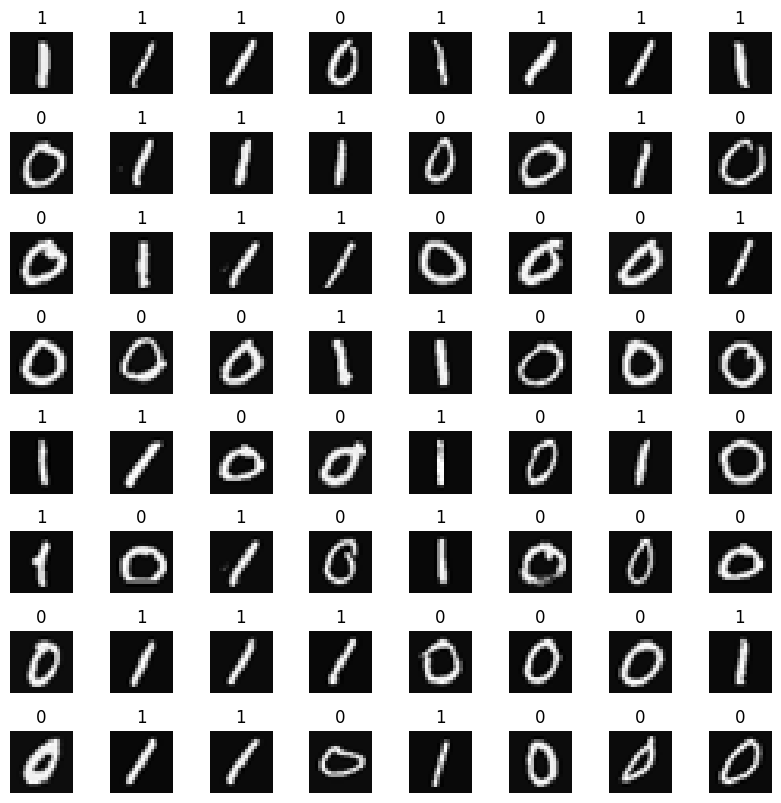

In [67]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 模型表示

在本次练习中，您将使用下图所示的神经网络。
- 这个神经网络有三个带有S形激活函数的全连接层。
    - 请回忆我们的输入是数字图像的像素值。
    - 由于图像大小为$20\times20$，这给了我们$400$个输入。

![神经网络](images/C2_W1_Assign1.PNG)

- 这些参数的维度适用于一个具有25个单元的第1层，15个单元的第2层和第3层的输出单元。

    - 请回忆这些参数的维度是如何确定的：
        - 如果网络在一层中有$s_{in}$个单元，在下一层中有$s_{out}$个单元，那么
            - $W$ 的维度将是$s_{in} \times s_{out}$。
            - $b$ 将是一个具有$s_{out}$个元素的向量。
  
    - 因此，`W` 和 `b` 的形状是
        - 第1层：`W1` 的形状是 (400, 25)，`b1` 的形状是 (25,)
        - 第2层：`W2` 的形状是 (25, 15)，`b2` 的形状是 (15,)
        - 第3层：`W3` 的形状是 (15, 1)，`b3` 的形状是 (1,)
>**注意：** 偏差向量 `b` 可以表示为1-D (n,) 或 2-D (n,1) 数组。Tensorflow使用1-D表示法，本实验室将保持这个约定。          

<a name="2.4"></a>
### 2.4 Tensorflow 模型实现


Tensorflow 模型是逐层构建的。层的输入维度（上面的 $s_{in}$）由系统为您计算。您需要指定一个层的*输出维度*，以确定下一层的输入维度。第一层的输入维度是根据在下面的 `model.fit` 语句中指定的输入数据的大小来确定的。
> **注意：** 也可以添加一个输入层来指定第一层的输入维度。例如：
`tf.keras.Input(shape=(400,))，#指定输入形状`
我们将在这里包括这一点，以说明一些模型的大小。

<a name="ex01"></a>
### 练习 1

在下面使用 Keras [Sequential 模型](https://keras.io/guides/sequential_model/) 和 [Dense 层](https://keras.io/api/layers/core_layers/dense/)，使用 sigmoid 激活函数构建上面描述的网络。

In [68]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),  #specify input size
        ### START CODE HERE ### 
        Dense(25,activation='sigmoid',name='layer1'),
        Dense(15,activation='sigmoid',name='layer2'),
        Dense(1,activation='sigmoid',name='layer3')
    
        ### END CODE HERE ### 
    ], name="my_model"
)


In [69]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to Expand) </b></font></summary>
The `model.summary()` function displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown. Note, the names of the layers may vary as they are auto-generated.  
    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
=================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________
```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
As described in the lecture:
    
```python
model = Sequential(                      
    [                                   
        tf.keras.Input(shape=(400,)),    # specify input size (optional)
        Dense(25, activation='sigmoid'), 
        Dense(15, activation='sigmoid'), 
        Dense(1,  activation='sigmoid')  
    ], name = "my_model"                                    
)                                       
``` 

In [70]:
# UNIT TESTS
from public_tests import *

test_c1(model)

All tests passed!


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [71]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15  # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1  # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params)

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [72]:
[layer1, layer2, layer3] = model.layers

In [73]:
#### Examine Weights shapes
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (1,)
```

`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [74]:
print(model.layers[2].weights)

[<tf.Variable 'layer3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.04752684],
       [ 0.3022486 ],
       [ 0.2943527 ],
       [-0.07464081],
       [ 0.08380252],
       [ 0.29506284],
       [ 0.2234348 ],
       [ 0.45269758],
       [-0.30655402],
       [ 0.39540535],
       [-0.55827326],
       [-0.25643697],
       [-0.28905755],
       [-0.46987563],
       [-0.26903862]], dtype=float32)>, <tf.Variable 'layer3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [75]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X, y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 0.6220
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4661
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3236
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2217
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1582
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1189
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0936
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0762
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 13/20
32/32 [==============================

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.

In [76]:
prediction = model.predict(X[0].reshape(1, 400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1, 400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 70ms/step
 predicting a zero: [[0.01496846]]
1/1 [==============================] - 0s 23ms/step
 predicting a one:  [[0.98365754]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [77]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 23ms/step


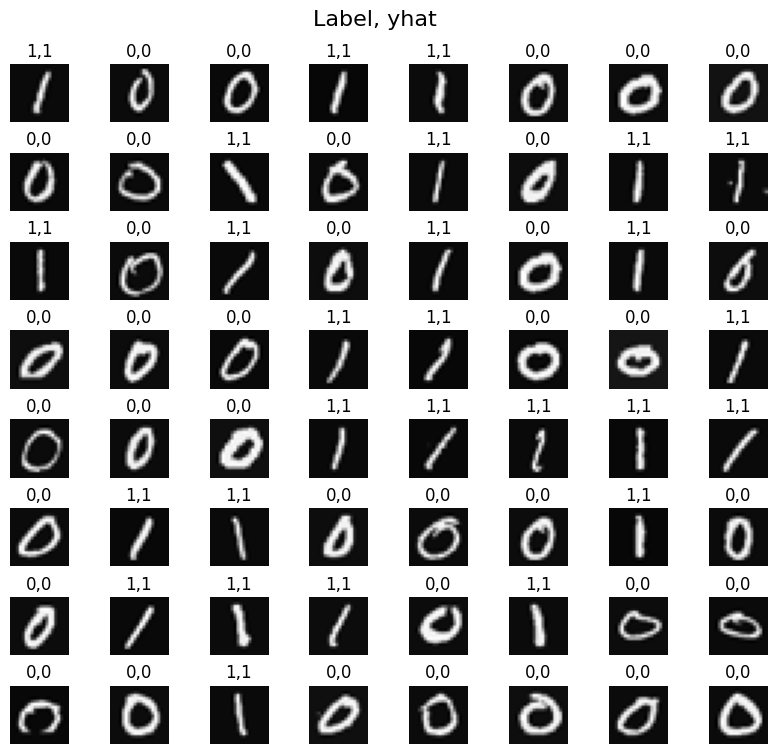

In [78]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1, 400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index, 0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="images/C2_W1_dense2.PNG" width="600" height="450">


<a name="ex02"></a>
### 练习 2

在下面构建一个密集层子程序。课堂上的示例使用了一个 for 循环来访问层中的每个单元 (`j`)，执行该单元的权重的点积 (`W[:,j]`)，并将单元的偏置相加 (`b[j]`) 以形成 `z`。然后，将激活函数 `g(z)` 应用于该结果。本节将不使用可选讲座中描述的一些矩阵操作。这些将在以后的部分中探讨。

In [85]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    ### START CODE HERE ### 
    for i in range(units):
        z=np.dot(a_in,W[:,i])+b[i]
        a_out[i]=g(z)    
    ### END CODE HERE ### 
    return (a_out)


In [86]:
# Quick Check
x_tst = 0.1 * np.arange(1, 3, 1).reshape(2, )  # (1 examples, 2 features)
W_tst = 0.1 * np.arange(1, 7, 1).reshape(2, 3)  # (2 input features, 3 output features)
b_tst = 0.1 * np.arange(1, 4, 1).reshape(3, )  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


**Expected Output**
```
[0.54735762 0.57932425 0.61063923]
```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
As described in the lecture:
    
```python
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):             
        w =                            # Select weights for unit j. These are in column j of W
        z =                            # dot product of w and a_in + b
        a_out[j] =                     # apply activation to z
    return(a_out)
```
   
    
<details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>

    
```python
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):             
        w = W[:,j]                     
        z = np.dot(w, a_in) + b[j]     
        a_out[j] = g(z)                
    return(a_out)
``` 

In [87]:
# UNIT TESTS
test_c2(my_dense)

All tests passed!


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [89]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return (a3)

We can copy trained weights and biases from Tensorflow.

In [90]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [91]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print("yhat = ", yhat, " label= ", y[0, 0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print("yhat = ", yhat, " label= ", y[500, 0])

yhat =  0  label=  0
yhat =  1  label=  1


Run the following cell to see predictions from both the Numpy model and the Tensorflow model. This takes a moment to run.

1/1 [==============================] - 0s 22ms/step


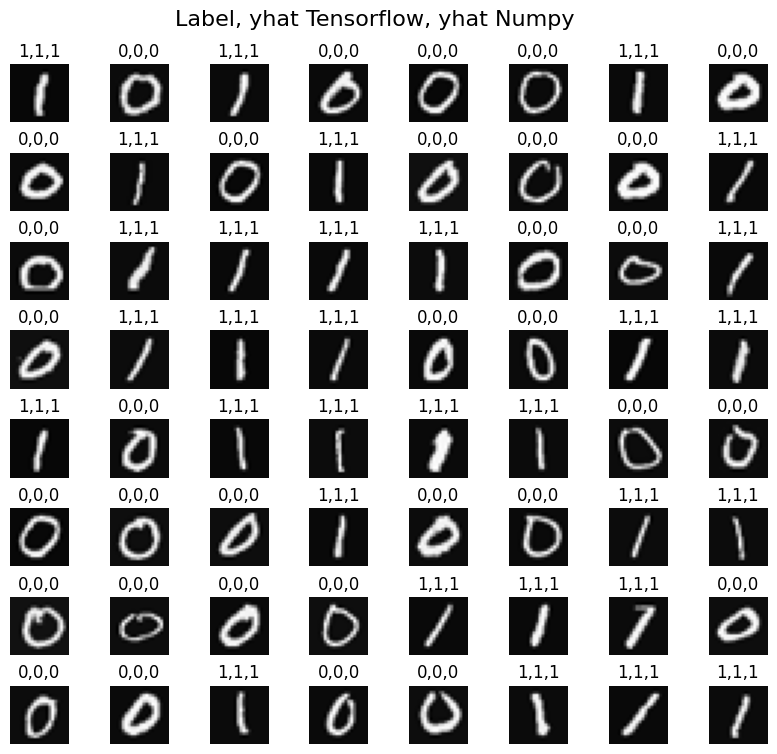

In [92]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1, 400))
    tf_yhat = int(tf_prediction >= 0.5)

    # Display the label above the image
    ax.set_title(f"{y[random_index, 0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

<a name="2.6"></a>
### 2.6 Vectorized NumPy Model Implementation (Optional)
The optional lectures described vector and matrix operations that can be used to speed the calculations.
Below describes a layer operation that computes the output for all units in a layer on a given input example:

<img src="images/C2_W1_VectorMatrix.PNG" width="600" height="450">

We can demonstrate this using the examples `X` and the `W1`,`b1` parameters above. We use `np.matmul` to perform the matrix multiply. Note, the dimensions of x and W must be compatible as shown in the diagram above.
### 2.6 向量化的 NumPy 模型实现（可选）
可选讲座中描述了可以用于加速计算的向量和矩阵操作。
下面描述了在给定输入示例上计算层中所有单元输出的层操作：

![图片](images/C2_W1_VectorMatrix.PNG)

我们可以使用上面的示例 `X` 和 `W1`, `b1` 参数来演示这个过程。我们使用 `np.matmul` 来执行矩阵乘法。注意，x 和 W 的维度必须如上图所示兼容。

In [93]:
x = X[0].reshape(-1, 1)  # column vector (400,1)
z1 = np.matmul(x.T, W1) + b1  # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


You can take this a step further and compute all the units for all examples in one Matrix-Matrix operation.

<img src="images/C2_W1_MatrixMatrix.PNG" width="600" height="450">
The full operation is $\mathbf{Z}=\mathbf{XW}+\mathbf{b}$. This will utilize NumPy broadcasting to expand $\mathbf{b}$ to $m$ rows. If this is unfamiliar, a short tutorial is provided at the end of the notebook.
您可以进一步进行操作，使用一个矩阵-矩阵操作计算所有示例中的所有单元。

![图片](images/C2_W1_MatrixMatrix.PNG)

完整的操作是 $\mathbf{Z}=\mathbf{XW}+\mathbf{b}$。这将利用 NumPy 广播功能将 $\mathbf{b}$ 扩展为 $m$ 行。如果这不熟悉，可以在笔记本的末尾提供一个简短的教程。

<a name="ex03"></a>
### Exercise 3

Below, compose a new `my_dense_v` subroutine that performs the layer calculations for a matrix of examples. This will utilize `np.matmul()`. 

In [100]:
# UNQ_C3
# GRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j,1)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
    ### START CODE HERE ### 
    Z=A_in@W+b
    A_out=g(Z)

    ### END CODE HERE ### 
    return (A_out)

In [101]:
X_tst = 0.1 * np.arange(1, 9, 1).reshape(4, 2)  # (4 examples, 2 features)
W_tst = 0.1 * np.arange(1, 7, 1).reshape(2, 3)  # (2 input features, 3 output features)
b_tst = 0.1 * np.arange(1, 4, 1).reshape(1, 3)  # (3 features, 1)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


**Expected Output**

```
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]
 ```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    In matrix form, this can be written in one or two lines. 
    
       Z = np.matmul of A_in and W plus b    
       A_out is g(Z)  
<details>
  <summary><font size="3" color="darkgreen"><b>Click for code</b></font></summary>

```python
def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j,1)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
    Z = np.matmul(A_in,W) + b    
    A_out = g(Z)                 
    return(A_out)
```


In [102]:
# UNIT TESTS
test_c3(my_dense_v)

All tests passed!


The following cell builds a three-layer neural network utilizing the `my_dense_v` subroutine above.

In [ ]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X, W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return (A3)

We can again copy trained weights and biases from Tensorflow.

In [ ]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

Let's make a prediction with the new model. This will make a prediction on *all of the examples at once*. Note the shape of the output.

In [ ]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
Prediction.shape

We'll apply a threshold of 0.5 as before, but to all predictions at once.

In [ ]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ", Yhat[0], "predict a one: ", Yhat[500])

Run the following cell to see predictions. This will use the predictions we just calculated above. This takes a moment to run.

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y[random_index, 0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off()
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

You can see how one of the misclassified images looks.

In [ ]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index, 0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

<a name="2.7"></a>
### 2.7 Congratulations!
You have successfully built and utilized a neural network.

<a name="2.8"></a>
### 2.8 NumPy Broadcasting Tutorial (Optional)


In the last example,  $\mathbf{Z}=\mathbf{XW} + \mathbf{b}$ utilized NumPy broadcasting to expand the vector $\mathbf{b}$. If you are not familiar with NumPy Broadcasting, this short tutorial is provided.

$\mathbf{XW}$  is a matrix-matrix operation with dimensions $(m,j_1)(j_1,j_2)$ which results in a matrix with dimension  $(m,j_2)$. To that, we add a vector $\mathbf{b}$ with dimension $(j_2,)$.  $\mathbf{b}$ must be expanded to be a $(m,j_2)$ matrix for this element-wise operation to make sense. This expansion is accomplished for you by NumPy broadcasting.

Broadcasting applies to element-wise operations.  
Its basic operation is to 'stretch' a smaller dimension by replicating elements to match a larger dimension.

More [specifically](https://NumPy.org/doc/stable/user/basics.broadcasting.html): 
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
- they are equal, or
- one of them is 1   

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Here are some examples:

<figure>
    <center> <img src="./images/C2_W1_Assign1_BroadcastIndexes.PNG"  alt='missing' width="400"  ><center/>
    <figcaption>Calculating Broadcast Result shape</figcaption>
<figure/>

The graphic below describes expanding dimensions. Note the red text below:

<figure>
    <center> <img src="./images/C2_W1_Assign1_Broadcasting.gif"  alt='missing' width="600"  ><center/>
    <figcaption>Broadcast notionally expands arguments to match for element wise operations</figcaption>
<figure/>

The graphic above shows NumPy expanding the arguments to match before the final operation. Note that this is a notional description. The actual mechanics of NumPy operation choose the most efficient implementation.

For each of the following examples, try to guess the size of the result before running the example.

In [ ]:
a = np.array([1, 2, 3]).reshape(-1, 1)  #(3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

Note that this applies to all element-wise operations:

In [ ]:
a = np.array([1, 2, 3]).reshape(-1, 1)  #(3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

<figure>
    <img src="./images/C2_W1_Assign1_VectorAdd.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Row-Column Element-Wise Operations</b></figcaption></center>
<figure/>

In [ ]:
a = np.array([1, 2, 3, 4]).reshape(-1, 1)
b = np.array([1, 2, 3]).reshape(1, -1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

This is the scenario in the dense layer you built above. Adding a 1-D vector $b$ to a (m,j) matrix.
<figure>
    <img src="./images/C2_W1_Assign1_BroadcastMatrix.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Matrix + 1-D Vector</b></figcaption></center>
<figure/>